<a href="https://colab.research.google.com/github/bustanularifin666/MachineLearningTasks/blob/main/TaskWeek5/EDA_2022_EPL_Top_Scorer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Muhammad Bustanul Arifin Nur Fathurrahman
1103228224

In [405]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns

In [406]:
#load dataset
from google.colab import drive
drive.mount('/content/drive')

path_file_csv = "/content/drive/My Drive/Dataset/PL23_players_stats.csv"

dfr = pd.read_csv(path_file_csv)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [407]:
dfr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623 entries, 0 to 622
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Team           623 non-null    object 
 1   JerseyNo       623 non-null    int64  
 2   Player         623 non-null    object 
 3   Position       623 non-null    object 
 4   Apearances     623 non-null    int64  
 5   Substitutions  623 non-null    int64  
 6   Goals          623 non-null    int64  
 7   Penalties      623 non-null    int64  
 8   YellowCards    623 non-null    float64
 9   RedCards       623 non-null    float64
dtypes: float64(2), int64(5), object(3)
memory usage: 48.8+ KB


In [408]:
#cek deskripsi statistik
dfr.head()

,Team,JerseyNo,Player,Position,Apearances,Substitutions,Goals,Penalties,YellowCards,RedCards
0,Arsenal,7,Bukayo Saka,Defender/Midfielder,40,3,12,2,6.0,0.0
1,Arsenal,6,Gabriel,Defender,37,1,5,0,7.0,1.0
2,Arsenal,32,Aaron Ramsdale,Goalkeeper,37,0,0,0,1.0,0.0
3,Arsenal,4,Ben White,Defender,37,0,0,0,3.0,0.0
4,Arsenal,8,Martin Odegaard,Midfielder,36,4,7,0,4.0,0.0


In [409]:
dfr=dfr.drop(['Substitutions', 'YellowCards', 'RedCards', 'Player', 'JerseyNo'],axis=1)
dfr.head()

,Team,Position,Apearances,Goals,Penalties
0,Arsenal,Defender/Midfielder,40,12,2
1,Arsenal,Defender,37,5,0
2,Arsenal,Goalkeeper,37,0,0
3,Arsenal,Defender,37,0,0
4,Arsenal,Midfielder,36,7,0


In [410]:
#Hapus missing value
#Drop baris dengan nilai 'goals' < 10
dfr = dfr.loc[(dfr[['Goals']]>= 10).all(axis=1)]

#cek ukuran data untuk memastikan baris sudah di-drop
dfr.shape

(40, 5)

In [411]:
dfr.head()

,Team,Position,Apearances,Goals,Penalties
0,Arsenal,Defender/Midfielder,40,12,2
8,Arsenal,Midfielder,24,11,0
17,Arsenal,Forward,13,10,0
61,Aston Villa,Forward,34,11,1
69,Brentford,Forward,34,14,6


<Axes: xlabel='Goals'>

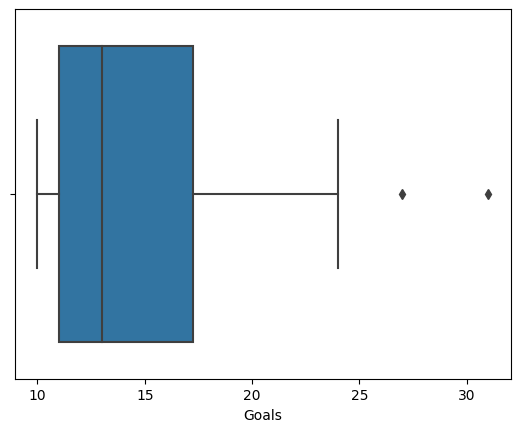

In [412]:
sns.boxplot(x=dfr['Goals'])

<Axes: xlabel='Penalties'>

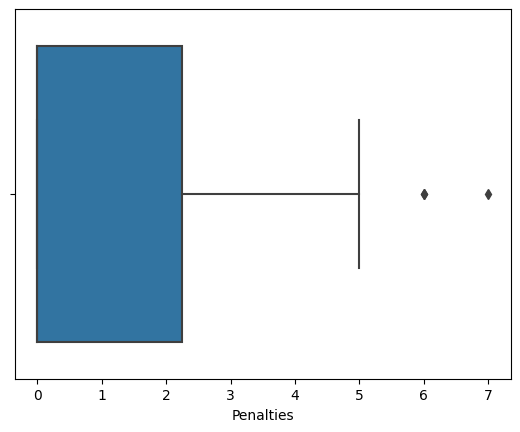

In [413]:
sns.boxplot(x=dfr['Penalties'])

<Axes: xlabel='Apearances'>

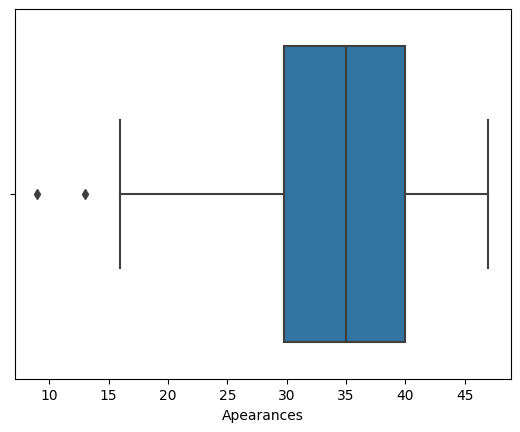

In [414]:
sns.boxplot(x=dfr['Apearances'])

Membuat batas atas dan batas bawah

Batas bawah = Q1 - 1.5 * IQR Batas atas = Q3 + 1.5 * IQR

In [415]:
Q1 = dfr.quantile(0.25)
Q3 = dfr.quantile(0.75)
IQR=Q3-Q1
dfr=dfr[~((dfr<(Q1-1.5*IQR))|(dfr>(Q3+1.5*IQR))).any(axis=1)]

# Cek ukuran dataset setelah kita drop outliers
dfr.shape

<ipython-input-415-c0b8b51794ce>:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = dfr.quantile(0.25)
<ipython-input-415-c0b8b51794ce>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = dfr.quantile(0.75)
<ipython-input-415-c0b8b51794ce>:4: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  dfr=dfr[~((dfr<(Q1-1.5*IQR))|(dfr>(Q3+1.5*IQR))).any(axis=1)]


(34, 5)

ANALISIS DATA DENGAN TEKNIK UNIVARIATE EDA

In [416]:
#pisahkan fitur dataset numerical dan categorical
numerical_features = ['Goals', 'Apearances', 'Penalties']
categorical_features = ['Team', 'Position']

                   jumlah sampel  persentase
Manchester City                6        17.6
Chelsea                        4        11.8
Leicester City                 4        11.8
Liverpool                      3         8.8
West Ham United                3         8.8
Arsenal                        2         5.9
Leeds United                   2         5.9
Manchester United              2         5.9
Aston Villa                    1         2.9
Brentford                      1         2.9
Crystal Palace                 1         2.9
Everton                        1         2.9
Norwich City                   1         2.9
Southampton                    1         2.9
Tottenham Hotspur              1         2.9
Watford                        1         2.9


<Axes: title={'center': 'Team'}>

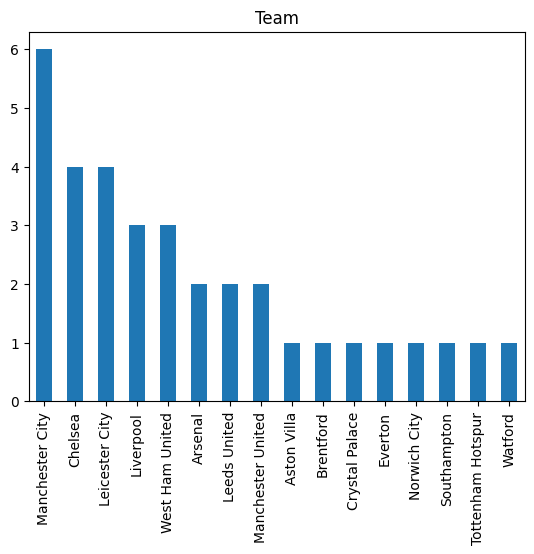

In [417]:
#Fitur kategorikal 'Team'
feature = categorical_features[0]
count = dfr[feature].value_counts()
percent = 100*dfr[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature)

                     jumlah sampel  persentase
Midfielder/Forward              18        52.9
Forward                          8        23.5
Midfielder                       7        20.6
Defender/Midfielder              1         2.9


<Axes: title={'center': 'Position'}>

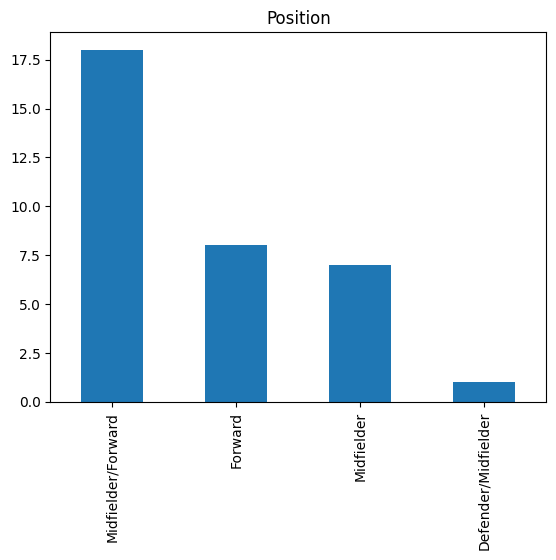

In [418]:
#Fitur kategorikal 'Position'
feature = categorical_features[1]
count = dfr[feature].value_counts()
percent = 100*dfr[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature)

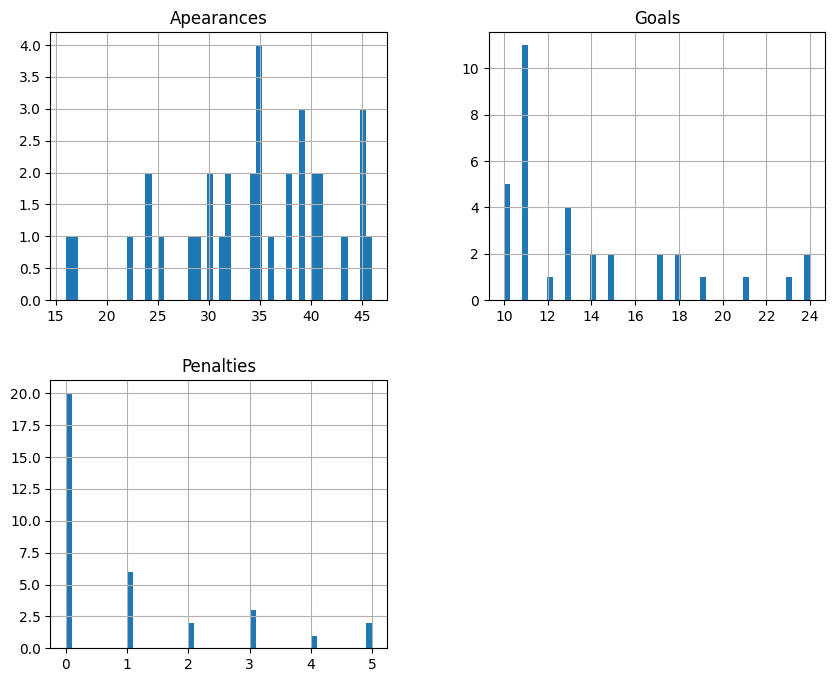

In [419]:
dfr.hist(bins=50, figsize=(10,8))
plt.show()

Informasi dari histogram di atas:

Rentang Apperances yang mencetak 10++ gol cukup tinggi, dari 15 hingga 45.

Semakin banyak jumlah gol, semakin sedikit pemain yang melakukannya.

Semakin banyak penalty yang didapat, semakin sedikit pemain (sample)nya.

MULTIVARIATE ANALYSIS

Analisis pada fitur kategori dan numerik

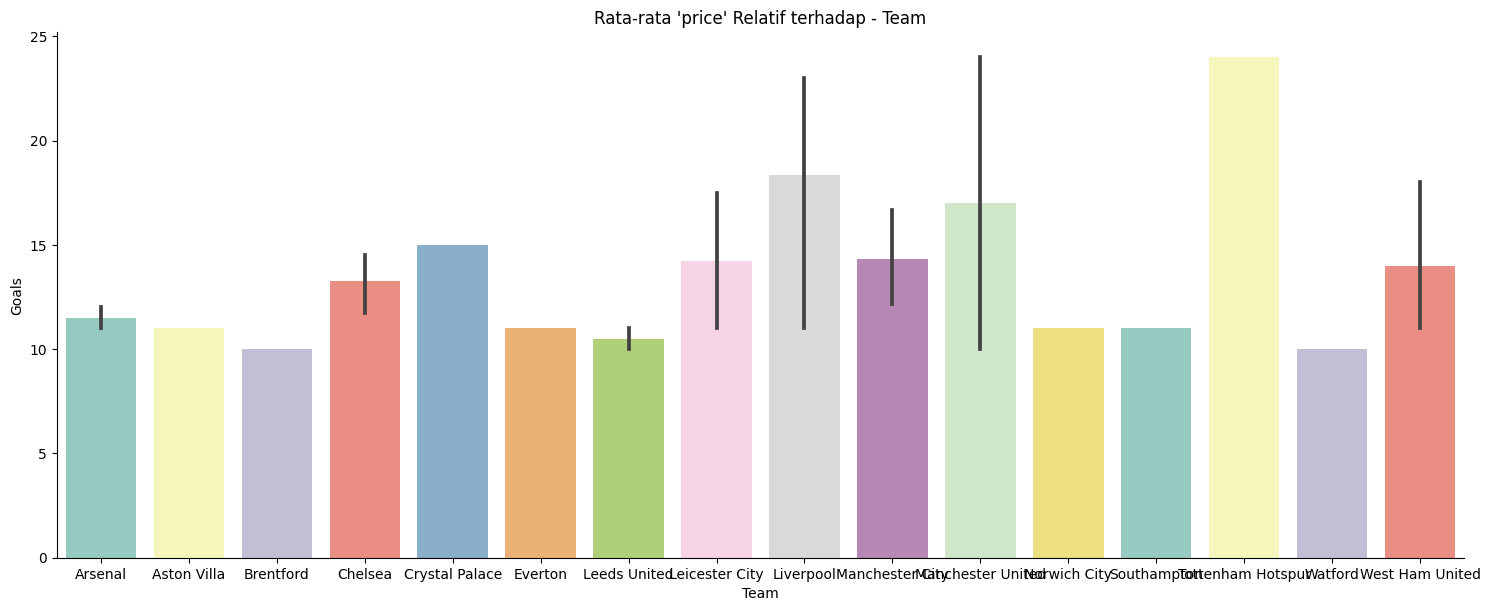

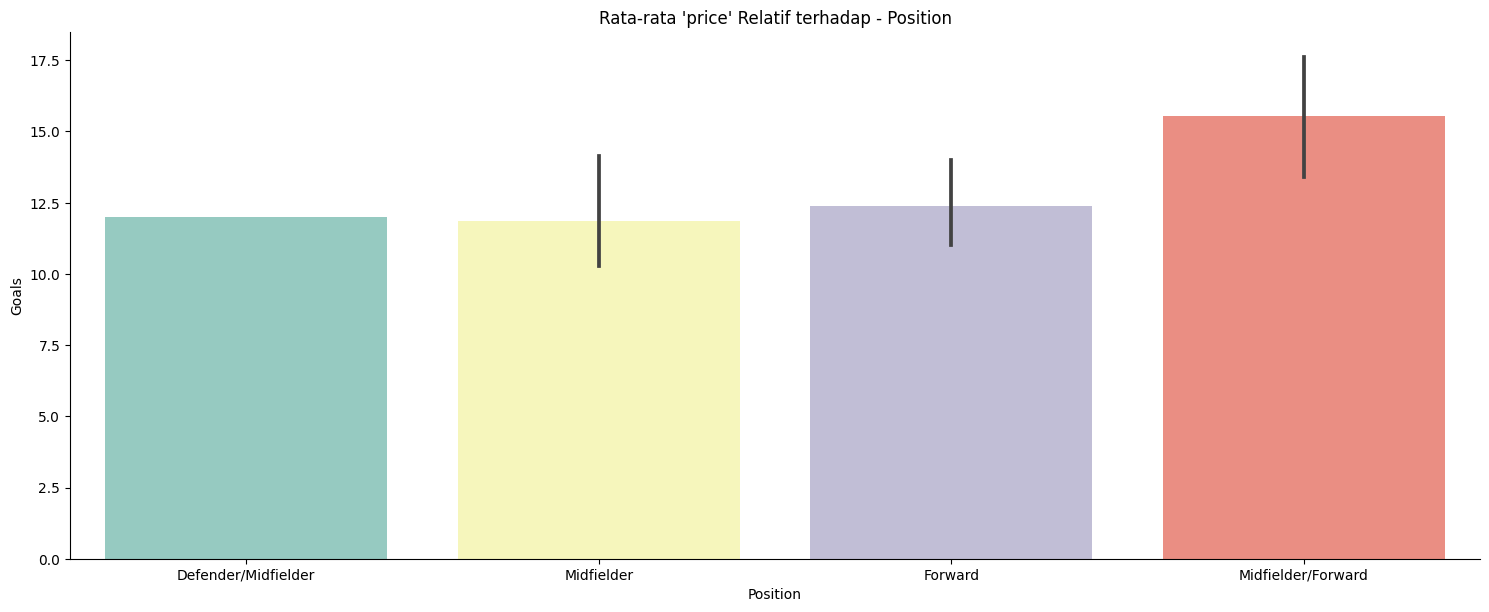

In [420]:
#cek rata-rata harga terhadap pengaruh masing-masing kategorikal fitur
cat_features = dfr.select_dtypes(include='object').columns.to_list()

for col in cat_features:
  sns.catplot(x=col, y="Goals", kind="bar", dodge=False, height = 6, aspect = 2.5,  data=dfr, palette="Set3")
  plt.title("Rata-rata 'Goals' Relatif terhadap - {}".format(col))

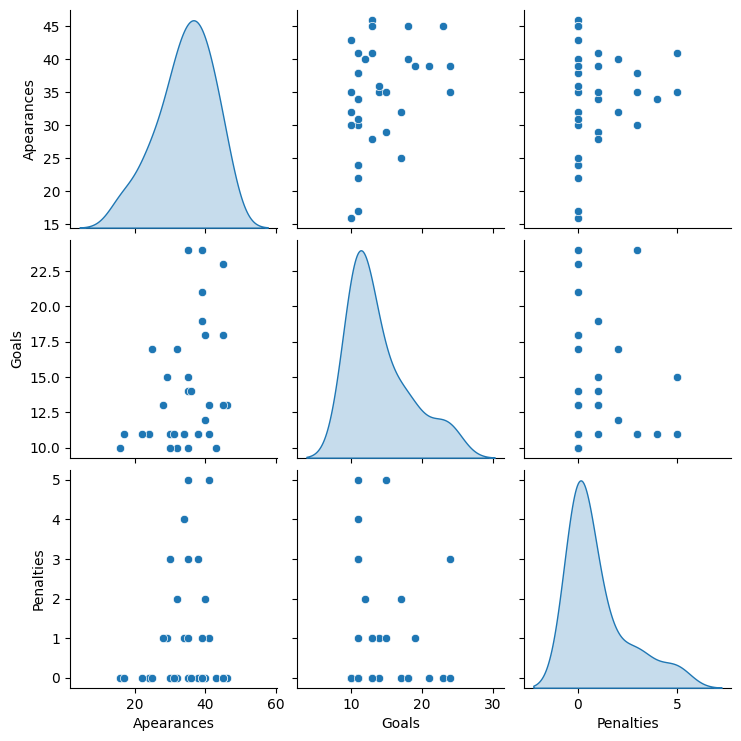

In [421]:
#mengamati hubungan antar fitur numerik dengan fungsi pairplot()
sns.pairplot(dfr, diag_kind = 'kde')

Relasi antara masing-masing fitur dengan target (goals).

Hasil analisis: fitur apperances memiliki korelasi yang kuat dengan price. Sedangkan penalties memiliki korelasi lemah (tidak membentuk pola)

<ipython-input-422-bd9ceb6be2e8>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = dfr.corr().round(2)


Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

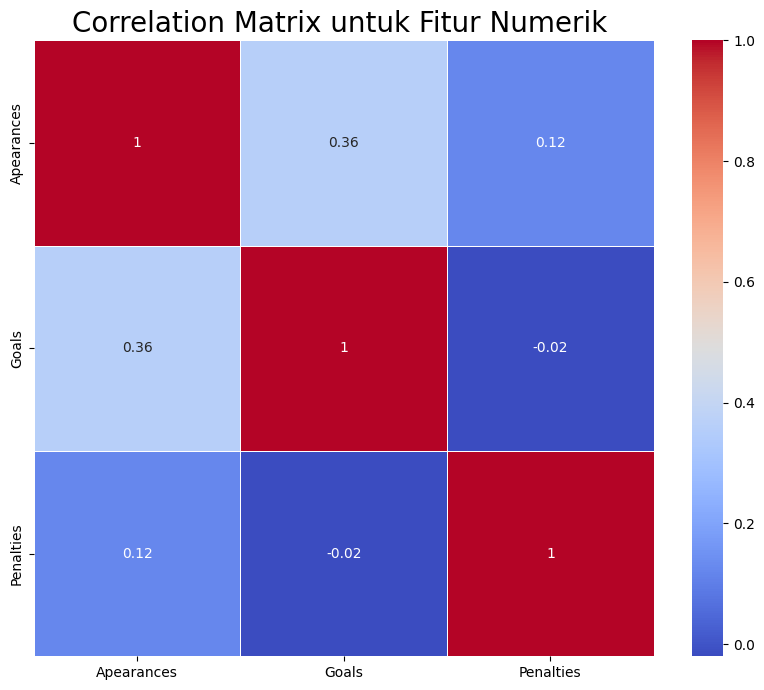

In [422]:
#evaluasai skor korelasi dengan fungsi corr()
plt.figure(figsize=(10, 8))
correlation_matrix = dfr.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

Keterangan matriks:

Koefisien korelasi mendekati 1 atau -1, menunjukkan kuatnya hubungan antara dua variabel (menggambarkan korelasi positif atau negatif).

Koefisien korelasi mendekati 0 menunjukkan lemahnya hubungan antara dua variabel.

Hasil analisis: fitur appreaces memiliki koefisien matriks mendekati 1 atau -1. Artinya fitu-fitur tersebut berkorelasi kuat dengan goals.

Fitur penalties memiliki korelasi yang kecil sehingga perlu di-drop.

In [423]:
dfr.drop(['Penalties'], inplace=True, axis=1)
dfr.head()

,Team,Position,Apearances,Goals
0,Arsenal,Defender/Midfielder,40,12
8,Arsenal,Midfielder,24,11
61,Aston Villa,Forward,34,11
77,Brentford,Midfielder/Forward,16,10
164,Chelsea,Midfielder/Forward,35,14


Data Preparation

In [424]:
#Encoding Categorial Feature
#one-hot-encoding
from sklearn.preprocessing import OneHotEncoder
dfr = pd.concat([dfr, pd.get_dummies(dfr['Team'], prefix='Team', drop_first=True)], axis=1)
dfr = pd.concat([dfr, pd.get_dummies(dfr['Position'], prefix='Position', drop_first=True)], axis=1)
dfr.drop(['Team','Position'], axis=1, inplace=True)
dfr.head()

,Apearances,Goals,Team_Aston Villa,Team_Brentford,Team_Chelsea,Team_Crystal Palace,Team_Everton,Team_Leeds United,Team_Leicester City,Team_Liverpool,Team_Manchester City,Team_Manchester United,Team_Norwich City,Team_Southampton,Team_Tottenham Hotspur,Team_Watford,Team_West Ham United,Position_Forward,Position_Midfielder,Position_Midfielder/Forward
0,40,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,24,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
61,34,11,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
77,16,10,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
164,35,14,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


Principal Component Analysis

PCA Reductional Dimensionality

Mengurangi fitur namun tetap mempertahankan informasi data

Mengubah fitur asli menjadi kumpulan fitur lain yang tidak berkorelasi linear.

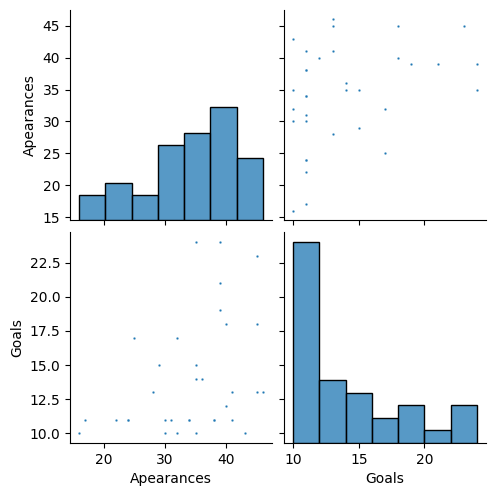

In [425]:
sns.pairplot(dfr[['Apearances','Goals']], plot_kws={"s": 3});

In [426]:
#PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=123)
pca.fit(dfr[['Apearances','Goals']])
princ_comp = pca.transform(dfr[['Apearances','Goals']])

In [427]:
pca.explained_variance_ratio_.round(3)

array([0.812, 0.188])

In [428]:
#split dataset menjadi data train dan data test sebelum transformasi (supaya transformasi diterapkan hanya pada data latih)
from sklearn.model_selection import train_test_split

X = dfr.drop(["Goals"], axis=1)
y = dfr["Goals"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state=123)

In [429]:
#Standardisasi dengan StandardScaler pada data latih
from sklearn.preprocessing import StandardScaler


numerical_features = ['Apearances']
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])
X_train[numerical_features].head()

,Apearances
317,0.573378
566,1.315881
331,1.315881
185,-1.282881
375,-0.292876


Standarisasi mengubah mean menjadi 0 dan standar deviasi menjadi 1

In [430]:
X_train[numerical_features].describe().round(4)

,Apearances
count,30.0000
mean,-0.0000
std,1.0171
min,-2.2729
25%,-0.5094
50%,0.0784
75%,0.6971
max,1.4396


MODEL DEVELOPMENT

KNN

KNN memberi nilai data uji sesuai dengan seberapa mirip dengan data latih (kesamaan fitur).

Membandingkan jarak satu sampel ke sampel pelatihan berdasar sejumlah k-tetangga terdekat.

KNN bisa menerapkan klasifikasi maupun regresi.

In [431]:
#Siapkan data frame untuk analisis model
models = pd.DataFrame(index=['train_mse', 'test_mse'],
                      columns=['KNN', 'RandomForest', 'Boosting'])

In [432]:
#Latih dengna model KNN
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_train)

RANDOM FOREST

In [433]:
# Impor library yang dibutuhkan
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

# buat model prediksi
RF = RandomForestRegressor(n_estimators=50, max_depth=16, random_state=55, n_jobs=-1)
RF.fit(X_train, y_train)

models.loc['train_mse','RandomForest'] = mean_squared_error(y_pred=RF.predict(X_train), y_true=y_train)

ALGORITMA BOOSTING (ADABOOST)

In [434]:
from sklearn.ensemble import AdaBoostRegressor

boosting = AdaBoostRegressor(n_estimators=50, learning_rate=0.05, random_state=55)
boosting.fit(X_train, y_train)
models.loc['train_mse','Boosting'] = mean_squared_error(y_pred=boosting.predict(X_train), y_true=y_train)


EVALUASI

In [435]:
#Scaling data uji
# Scale our numerical features so they have zero mean and a variance of one
X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])

Evaluasi ketiga model dengan metrik MSE

In [436]:
mse = pd.DataFrame(columns=['train', 'test'], index=['KNN','RF','Boosting'])
model_dict = {'KNN': knn, 'RF': RF, 'Boosting': boosting}
for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))/1e3
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))/1e3

mse

,train,test
KNN,0.014563,0.012285
RF,0.002814,0.004347
Boosting,0.003555,0.00346


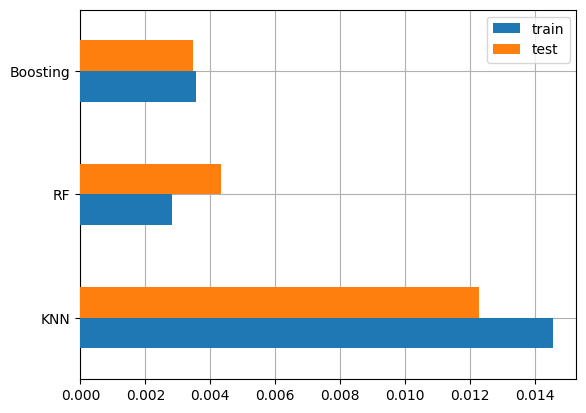

In [437]:
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

Algoritma Boosting memberikan error paling kecil saat test, sedangkan RF saat train.

In [438]:
#Uji model dengan data test
prediksi = X_test.iloc[:1].copy()
pred_dict = {'y_true':y_test[:1]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)

pd.DataFrame(pred_dict)


,y_true,prediksi_KNN,prediksi_RF,prediksi_Boosting
213,15,16.6,14.9,13.7
